### Emotion Detection

In [25]:
# importing libraries
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense ,Input, Dropout ,Flatten ,Conv2D
from tensorflow.keras.layers import BatchNormalization ,Activation ,MaxPooling2D
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG ,Image
import tensorflow as tf

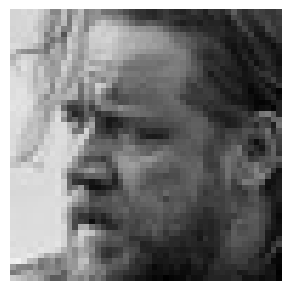

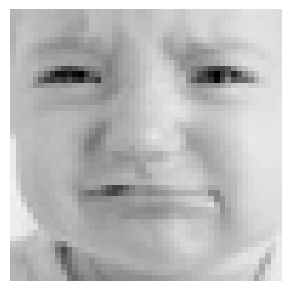

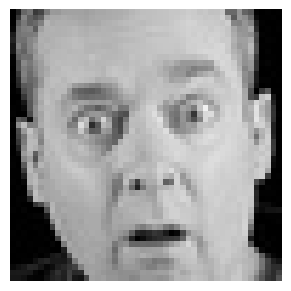

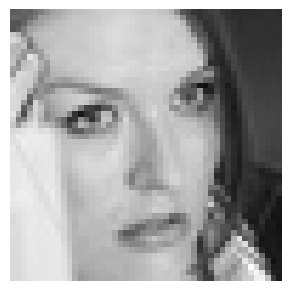

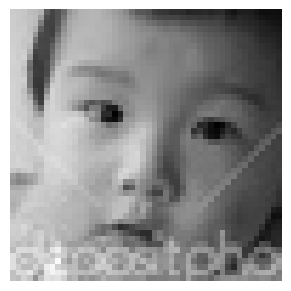

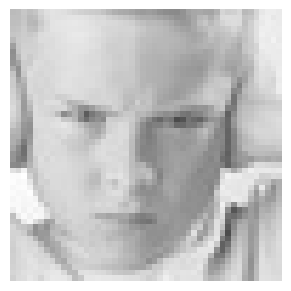

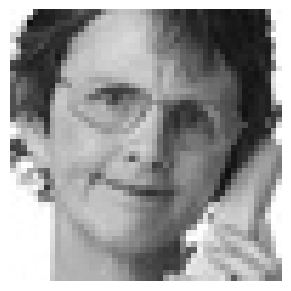

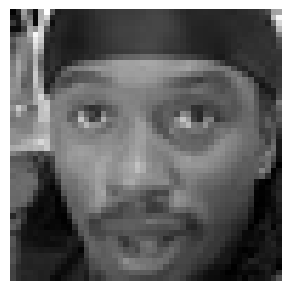

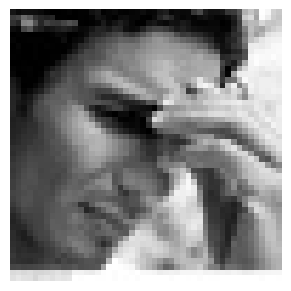

In [26]:
# Exporting Dataset
images=glob('E:/Emotion Detection/emotion_detection_course/train/**/**')
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [27]:
# Preparing Data  for training

In [28]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("E:/Emotion Detection/emotion_detection_course/train",target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_validation=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("E:/Emotion Detection/emotion_detection_course/test",target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [29]:
# Defining Model

In [30]:
# def Convolution(input_tensor,filters,kernal_size):
#     x=Conv2D(filters=filters,kernal_size=kernal_size,padding="same")(input_tensor)
#     x=BatchNormalization()(x)
#     x=Activation('relu')(x)
#     x=MaxPooling2D(pool_size=(2,2)(x))
#     x=Dropout(0.25)(x)

#     return x


def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x


In [31]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)

    return x


In [32]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(inputs, 64, (5, 5))
    conv_3 = Convolution(inputs, 128, (3, 3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten, 256)

    output = Dense(7, activation='softmax')(dense_1)
    model = Model(inputs=[inputs], outputs=[output])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [33]:
model=model_fer((48,48,1))
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 128)       0   

In [34]:
# initializing a mode;

In [35]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor = 'val_accuracy',save_weights_only = True, mode = 'max', verbose=1)
callbacks = [checkpoint] 

In [36]:
# Training the model

In [37]:
history = model.fit(x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=validation_generator, validation_steps=validation_steps, callbacks=callbacks)

Epoch 1/15
112/112 [==============================] - ETA: 0s - loss: 1.8632 - accuracy: 0.3137
Epoch 1: saving model to model_weights.h5
112/112 [==============================] - 113s 994ms/step - loss: 1.8632 - accuracy: 0.3137 - val_loss: 2.7472 - val_accuracy: 0.2119
Epoch 2/15
112/112 [==============================] - ETA: 0s - loss: 1.4833 - accuracy: 0.4344
Epoch 2: saving model to model_weights.h5
112/112 [==============================] - 84s 750ms/step - loss: 1.4833 - accuracy: 0.4344 - val_loss: 1.8390 - val_accuracy: 0.3193
Epoch 3/15
112/112 [==============================] - ETA: 0s - loss: 1.2214 - accuracy: 0.5446
Epoch 3: saving model to model_weights.h5
112/112 [==============================] - 85s 760ms/step - loss: 1.2214 - accuracy: 0.5446 - val_loss: 2.0334 - val_accuracy: 0.3376
Epoch 4/15
112/112 [==============================] - ETA: 0s - loss: 1.0035 - accuracy: 0.6379
Epoch 4: saving model to model_weights.h5
112/112 [==============================] - 10

In [38]:
model.evaluate(validation_generator)

449/449 [==============================] - 44s 98ms/step - loss: 4.1567 - accuracy: 0.2833


[4.156739711761475, 0.28332579135894775]

In [39]:
# Plotting Loss

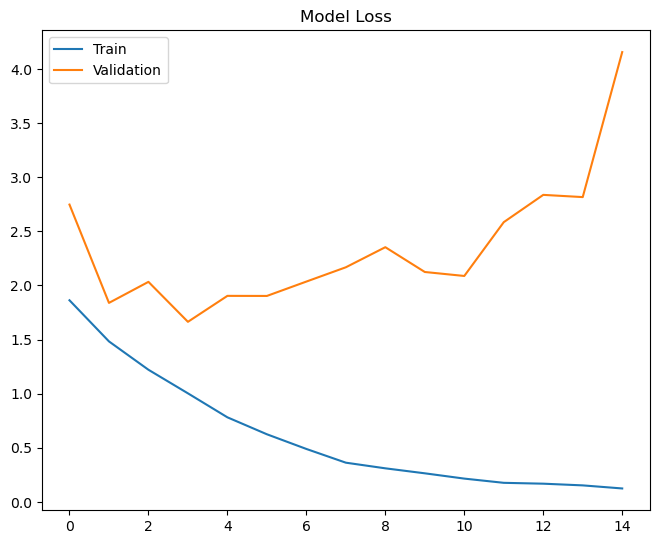

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

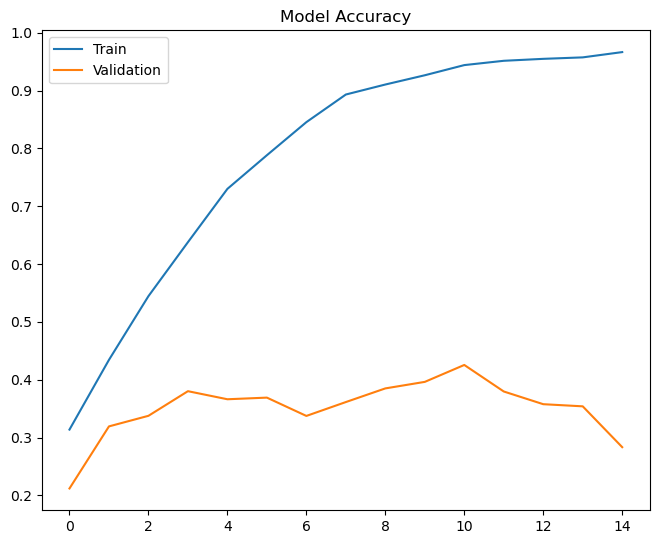

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [43]:
# saving model

In [44]:
model_json=model.to_json()
with open("model_a.json",'w') as json_file:
    json_file.write(model_json)